In [1]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('Raw_data/downloads_study757_mapped_rpk_filtered.csv')

In [3]:
first_parts = [col.split('_', 1)[0] for col in data.columns]
pd.Series(first_parts).value_counts()

POI-Bergithe        149
POI-AAD-Bergithe     88
Ovarian              73
HealthyCtrl          52
ROHHAD               46
MockIP               38
Canary               28
PosCtrl               6
peptide               1
Name: count, dtype: int64

In [4]:
# Search for columns containing 'ag' (case insensitive)
columns_with_ag = [col for col in data.columns if 'ag' in col.lower()]
print(columns_with_ag)


['MockIP_AG10_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H7_S379_R1_001', 'MockIP_AG11_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H8_S380_R1_001', 'MockIP_AG12_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H9_S381_R1_001', 'MockIP_AG13_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H10_S382_R1_001', 'MockIP_AG14_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H11_S383_R1_001', 'MockIP_AG15_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H12_S384_R1_001', 'MockIP_AG16_POI_Bergithe_Rerun_Oct_13_2025_Plate5_B12_S408_R1_001', 'MockIP_AG17_POI_Bergithe_Rerun_Oct_13_2025_Plate5_D12_S432_R1_001', 'MockIP_AG18_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H1_S469_R1_001', 'MockIP_AG19_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H2_S470_R1_001', 'MockIP_AG1_POI_Bergithe_Rerun_Oct_13_2025_Plate1_D10_S46_R1_001', 'MockIP_AG20_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H3_S471_R1_001', 'MockIP_AG21_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H4_S472_R1_001', 'MockIP_AG22_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H5_S473_R1_001', 'MockIP_AG23_POI_Bergithe_Rerun_Oct_13_2025

In [5]:
# Keep only columns that contain ROHHAD_NID624, Canary, HealthyCtrl, or MockIP (anywhere in the column name)
desired_keywords = ['ROHHAD_NID624', 'Canary', 'HealthyCtrl', 'MockIP']
columns_to_keep = [col for col in data.columns if any(keyword in col for keyword in desired_keywords)]

# Always include the peptide identifier column (assume it's named 'peptide')
if 'peptide' in data.columns:
    columns_to_keep = ['peptide'] + [col for col in columns_to_keep if col != 'peptide']

# Filter the data frame and set peptide names as the index so row names stay as peptide names
filtered_data = data[columns_to_keep].copy()
if 'peptide' in filtered_data.columns:
    filtered_data = filtered_data.set_index('peptide')

filtered_data.head()


,Canary_Canary10_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E6_S438_R1_001,Canary_Canary11_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E7_S439_R1_001,Canary_Canary12_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E8_S440_R1_001,Canary_Canary13_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E9_S441_R1_001,Canary_Canary14_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E10_S442_R1_001,Canary_Canary15_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E11_S443_R1_001,Canary_Canary16_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E12_S444_R1_001,Canary_Canary17_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F1_S445_R1_001,Canary_Canary18_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F2_S446_R1_001,Canary_Canary19_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F3_S447_R1_001,...,MockIP_HC49_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H5_S185_R1_001,MockIP_HC50_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H6_S186_R1_001,MockIP_HC51_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H7_S187_R1_001,MockIP_HC52_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H8_S188_R1_001,MockIP_HC53_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H9_S189_R1_001,MockIP_HC54_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H10_S190_R1_001,MockIP_HC55_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H11_S191_R1_001,MockIP_HC56_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H12_S192_R1_001,ROHHAD_NID624_09262025_rep1_POI_Bergithe_Rerun_Oct_13_2025_Plate5_B7_S403_R1_001,ROHHAD_NID624_09262025_rep1_POI_Bergithe_Rerun_Oct_13_2025_Plate5_D7_S427_R1_001
peptide,,,,,,,,,,,,,,,,,,,,,
gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapiens]_fragment_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.279865,0.0,0.0,0.0,1.270538,0.0,0.0,0.404187,0.0,0.0
gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-containing_protein_138_isoform_X2_[Homo_sapiens]_fragment_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sapiens]_fragment_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isoform_a_[Homo_sapiens]_fragment_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapiens]_fragment_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.684113,0.0,0.0


In [6]:
# The task is to compute the mean across MockIP ag samples, then use that to normalize HealthyCtrl and ROHHAD_NID624 columns.
# After normalization, compute log fold change, adding a pseudo count to avoid log(0).

pseudo_count = 1e-3  # Small value to avoid division by zero and taking log(0)

# 1. Find all MockIP columns (ag beads), HealthyCtrl, and ROHHAD_NID624 columns
mockip_cols = [col for col in filtered_data.columns if 'MockIP' in col and 'ag' in col.lower()]
healthy_cols = [col for col in filtered_data.columns if 'HealthyCtrl' in col]
rohhad_cols = [col for col in filtered_data.columns if 'ROHHAD_NID624' in col]

# 2. Compute the mean across mockIP ag columns for each peptide (row-wise)
mockip_mean = filtered_data[mockip_cols].mean(axis=1)

# 3. For each sample type, normalize their signal by the mockIP mean and take log2 with a pseudo-count
# To avoid SettingWithCopyWarning, use .loc accessor explicitly
for col in healthy_cols:
    filtered_data.loc[:, f'{col}_log2fc_over_mockip'] = np.log2((filtered_data[col] + pseudo_count) / (mockip_mean + pseudo_count))

for col in rohhad_cols:
    filtered_data.loc[:, f'{col}_log2fc_over_mockip'] = np.log2((filtered_data[col] + pseudo_count) / (mockip_mean + pseudo_count))


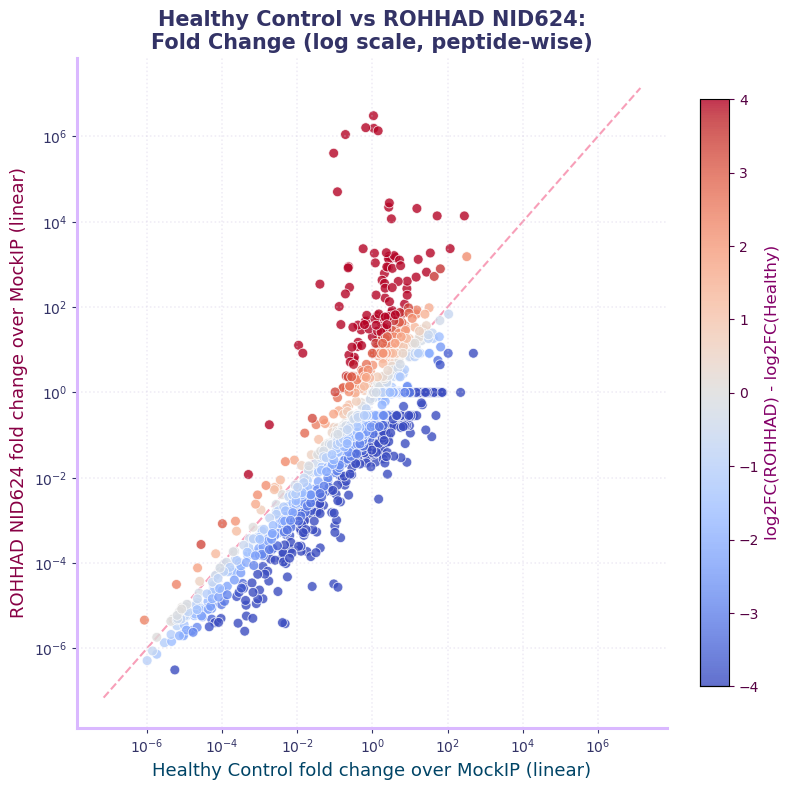

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'filtered_data' has peptide names as the index
if 'peptide' in filtered_data.columns:
    filtered_data = filtered_data.set_index('peptide')

# Identify the new columns containing log2 fold changes
healthy_log2fc_cols = [col for col in filtered_data.columns if col.endswith('_log2fc_over_mockip') and 'HealthyCtrl' in col]
rohhad_log2fc_cols = [col for col in filtered_data.columns if col.endswith('_log2fc_over_mockip') and 'ROHHAD_NID624' in col]

# For comparison, take the mean log2fc for each peptide across replicates of each group
healthy_log2fc_mean = filtered_data[healthy_log2fc_cols].mean(axis=1)
rohhad_log2fc_mean = filtered_data[rohhad_log2fc_cols].mean(axis=1)

# Convert log2FC to linear fold change for log scaling (pseudo-count to avoid 0)
healthy_linear_fc = np.power(2, healthy_log2fc_mean)
rohhad_linear_fc = np.power(2, rohhad_log2fc_mean)

plt.figure(figsize=(8, 8))
# Use a fun colorful colormap! We'll color by the log2 fold change difference between the two samples:
color_array = np.clip(rohhad_log2fc_mean - healthy_log2fc_mean, -4, 4)
cmap = plt.cm.coolwarm

scatter = plt.scatter(
    healthy_linear_fc, rohhad_linear_fc,
    c=color_array,
    cmap=cmap,
    alpha=0.8,
    edgecolor='w',
    s=50,
    linewidth=0.6
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Healthy Control fold change over MockIP (linear)', fontsize=13, color='#004466')
plt.ylabel('ROHHAD NID624 fold change over MockIP (linear)', fontsize=13, color='#880044')
plt.title('Healthy Control vs ROHHAD NID624:\nFold Change (log scale, peptide-wise)', fontsize=15, weight='bold', color='#333366')

# Fun, colorful axis and grid style
plt.tick_params(colors='#333366', which='both')
plt.grid(color='#cfc6e1', linestyle=':', linewidth=1.1, alpha=0.35)

cb = plt.colorbar(scatter, label='log2FC(ROHHAD)-log2FC(Healthy)', orientation='vertical', fraction=0.045)
cb.ax.tick_params(labelsize=10, colors='#550042')
cb.set_label('log2FC(ROHHAD) - log2FC(Healthy)', fontsize=12, color='#840068')

# Diagonal guide (y=x)
lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
plt.plot(lims, lims, color='#F5769B', linestyle='--', linewidth=1.5, alpha=0.7, zorder=0)

# Add a colorful spines effect via seaborn
sns.despine(left=False, bottom=False)
for spine in plt.gca().spines.values():
    spine.set_color('#dab8ff')
    spine.set_linewidth(2.2)

plt.tight_layout()
plt.show()


In [8]:
rohhad_linear_fc


peptide
gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapiens]_fragment_12                                          1.678170e-01
gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-containing_protein_138_isoform_X2_[Homo_sapiens]_fragment_11    1.000000e+00
gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sapiens]_fragment_1                                        1.000000e+00
gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isoform_a_[Homo_sapiens]_fragment_16                           1.000000e+00
gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapiens]_fragment_8                                           1.000000e+00
                                                                                                                                   ...     
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7                         1.605343e+06
gi|613410203

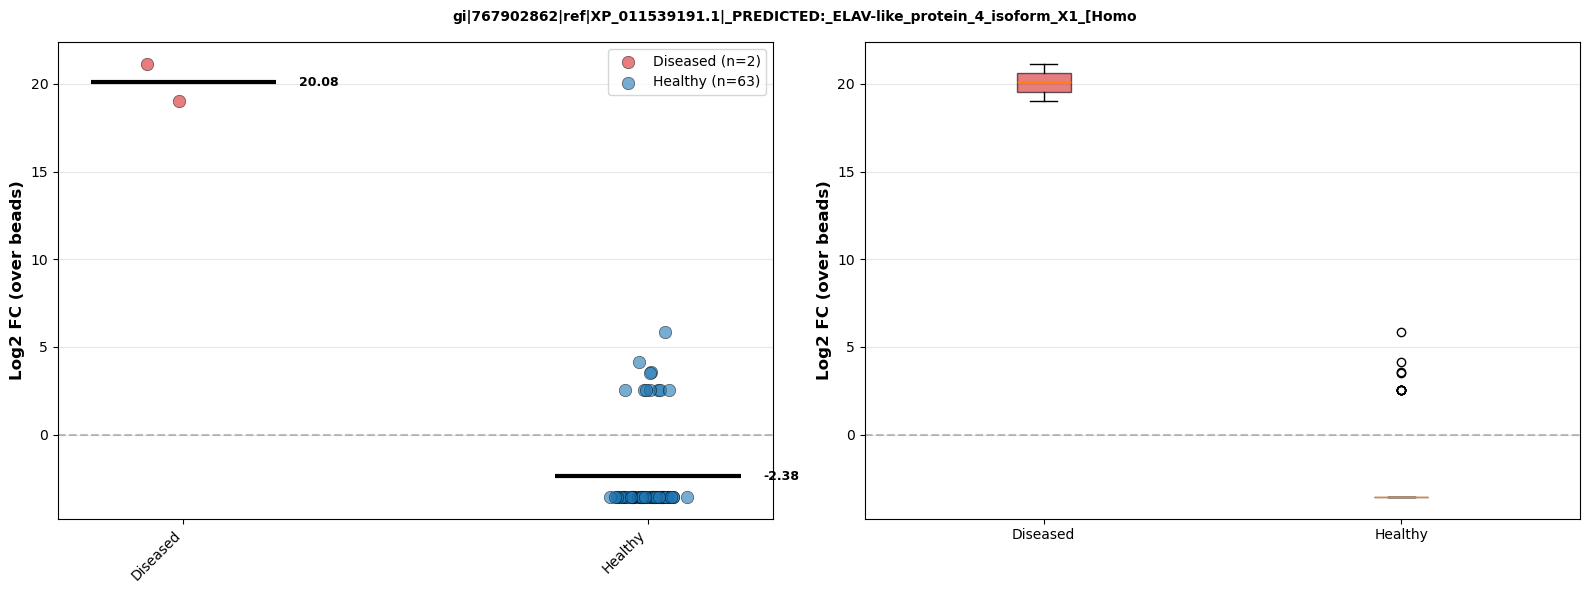

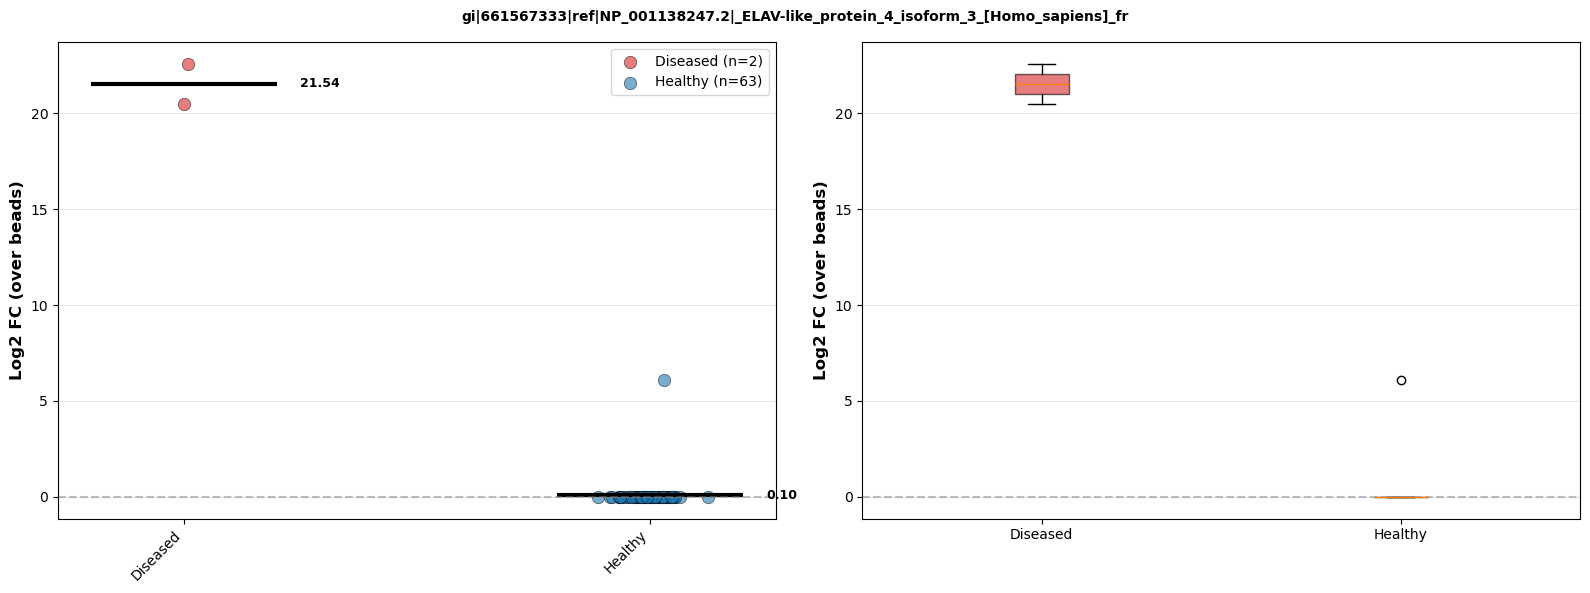

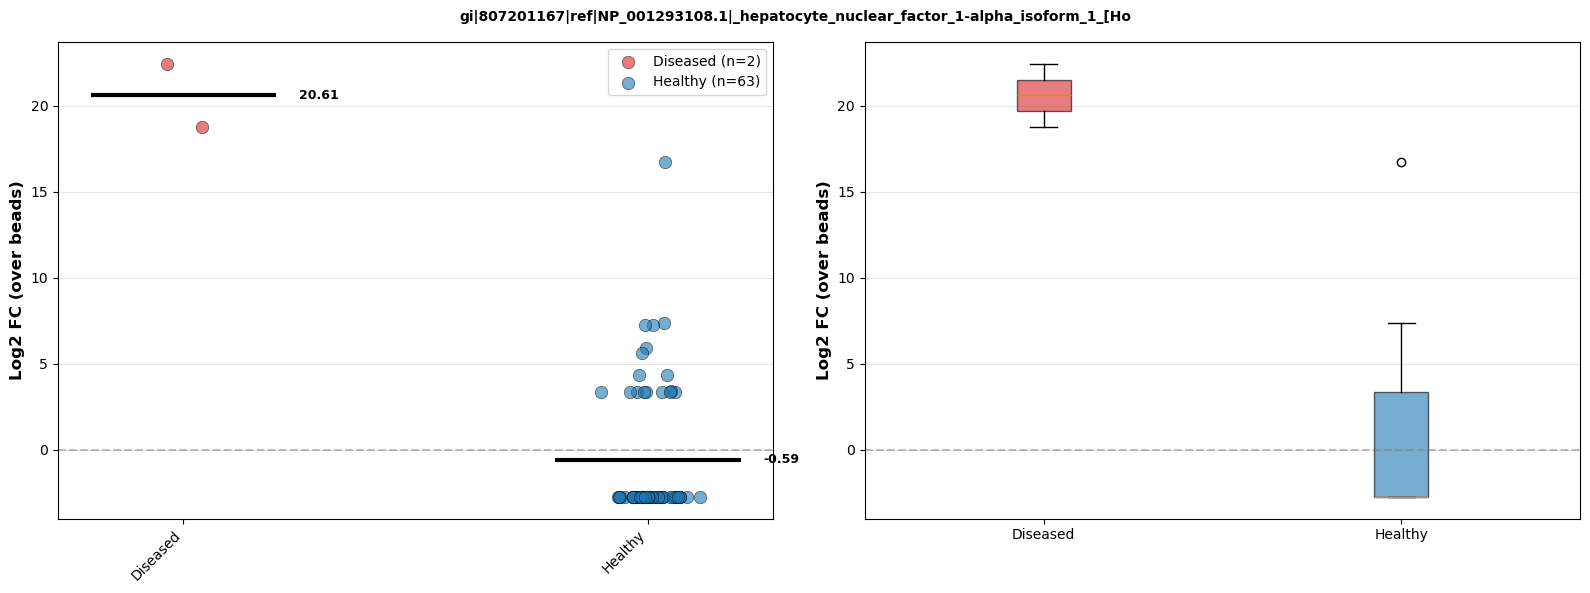

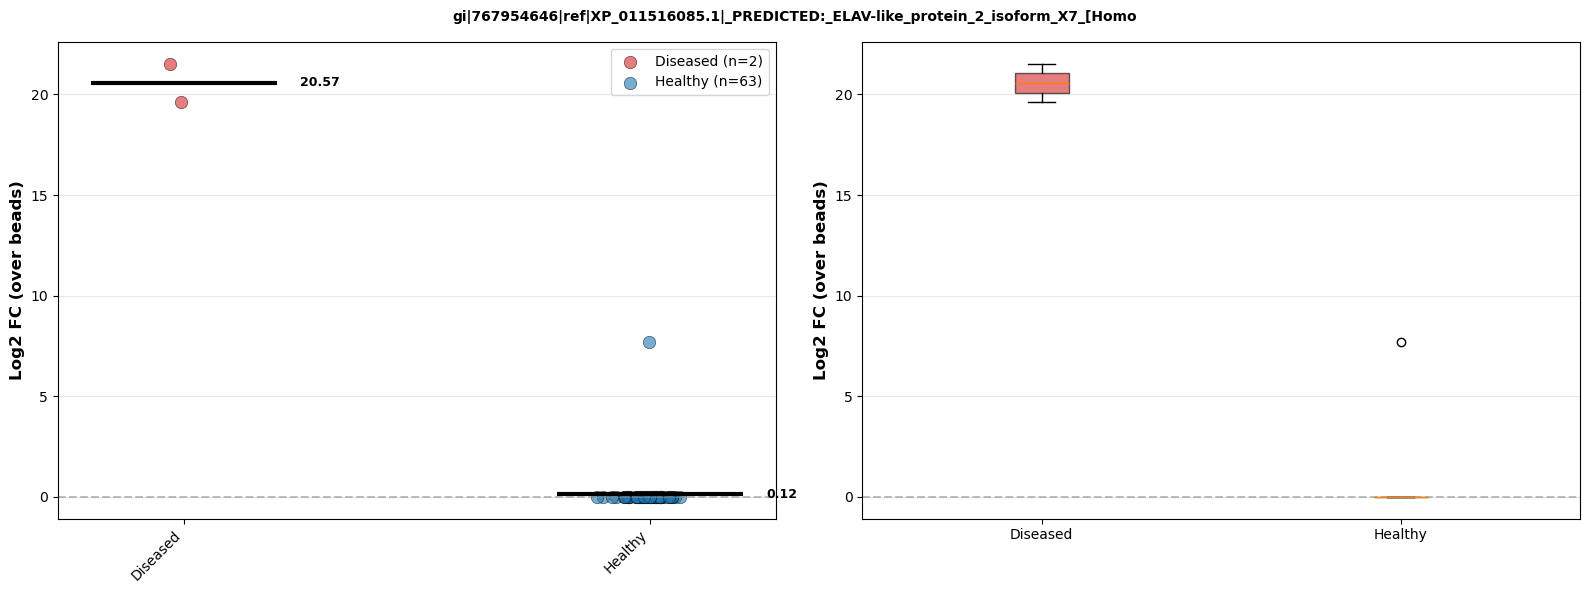

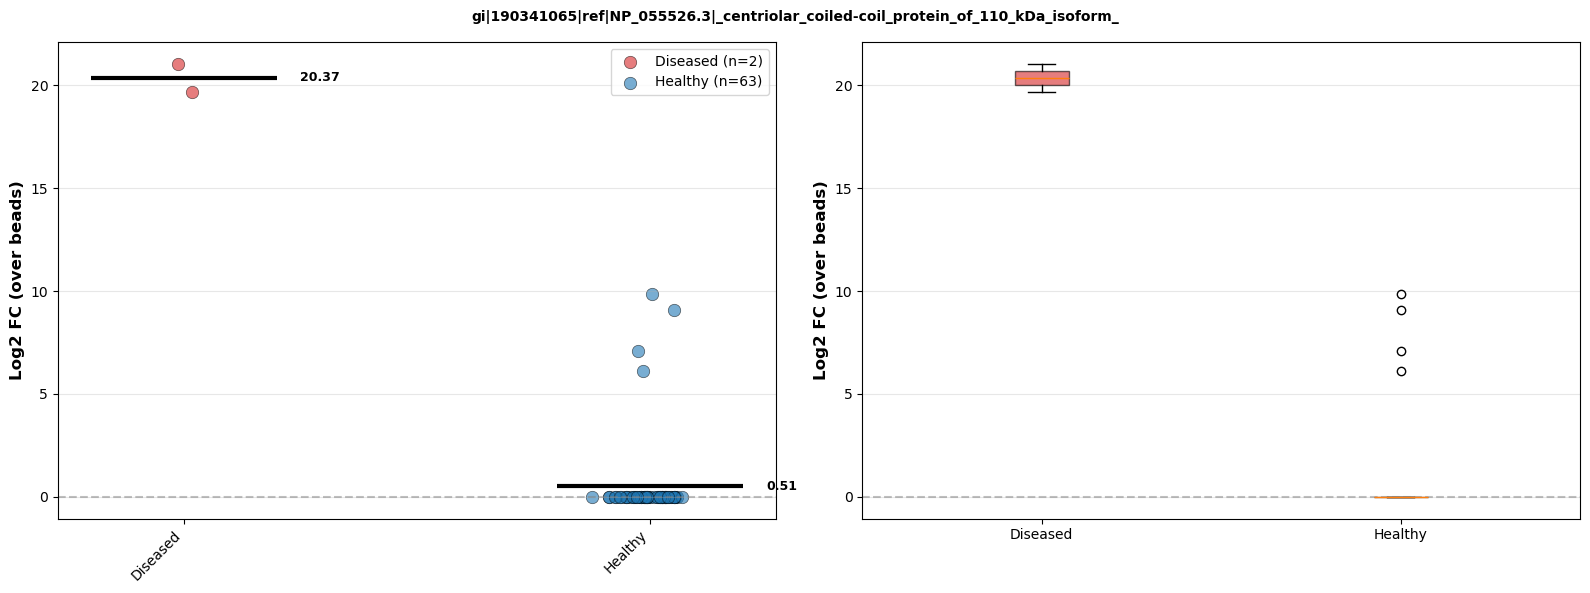

KeyboardInterrupt: 

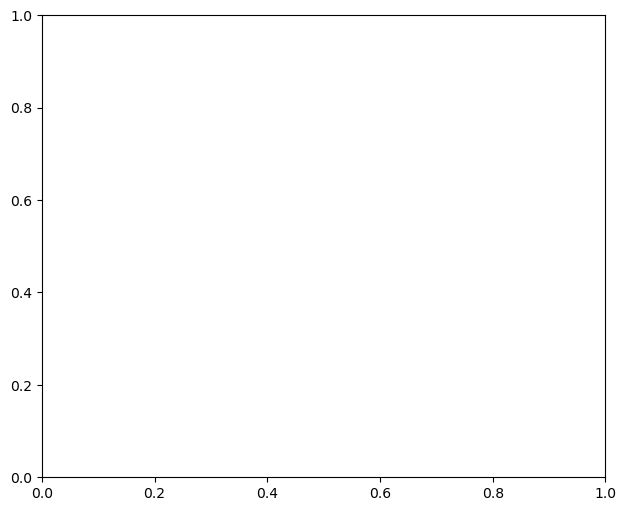

In [9]:
import importlib
import phip_seq_helper_functions
importlib.reload(phip_seq_helper_functions)
from phip_seq_helper_functions import plot_per_peptide_comparison

# Select column names:
diseased_columns = [col for col in filtered_data.columns if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")]
healthy_columns = [col for col in filtered_data.columns if "healthyctrl" in col.lower() and col.endswith("_log2fc_over_mockip")]

# Peptides where mean healthy < 1 and mean disease > 1 (log2fc)
peptide_data = []
# Use set to only allow unique short protein identifiers (e.g., by removing isoform/fragment label)
seen_base_names = set()
def peptide_base_name(peptide):
    # Extracts the part up to the first space or to the first |fragment_ label
    if "fragment" in peptide:
        return peptide.split("fragment")[0].strip()
    else:
        return peptide.split()[0].strip()

for peptide in filtered_data.index:
    base_name = peptide_base_name(peptide)
    if base_name in seen_base_names:
        continue  # skip replicates
    healthy_vals = filtered_data.loc[peptide, healthy_columns]
    diseased_vals = filtered_data.loc[peptide, diseased_columns]
    if (
        len(healthy_vals) > 0 and len(diseased_vals) > 0 and
        healthy_vals.mean() < 1 and
        diseased_vals.mean() > 1
    ):
        diff = diseased_vals.mean() - healthy_vals.mean()
        peptide_data.append((peptide, diff))
        seen_base_names.add(base_name)

# Only use top 10 hits (by difference: disease mean - healthy mean; descending)
top_peptides = [peptide for peptide, diff in sorted(peptide_data, key=lambda x: x[1], reverse=True)[:10]]

# Plot per peptide
for peptide in top_peptides:
    plot_per_peptide_comparison(filtered_data, peptide, diseased_columns, healthy_columns)

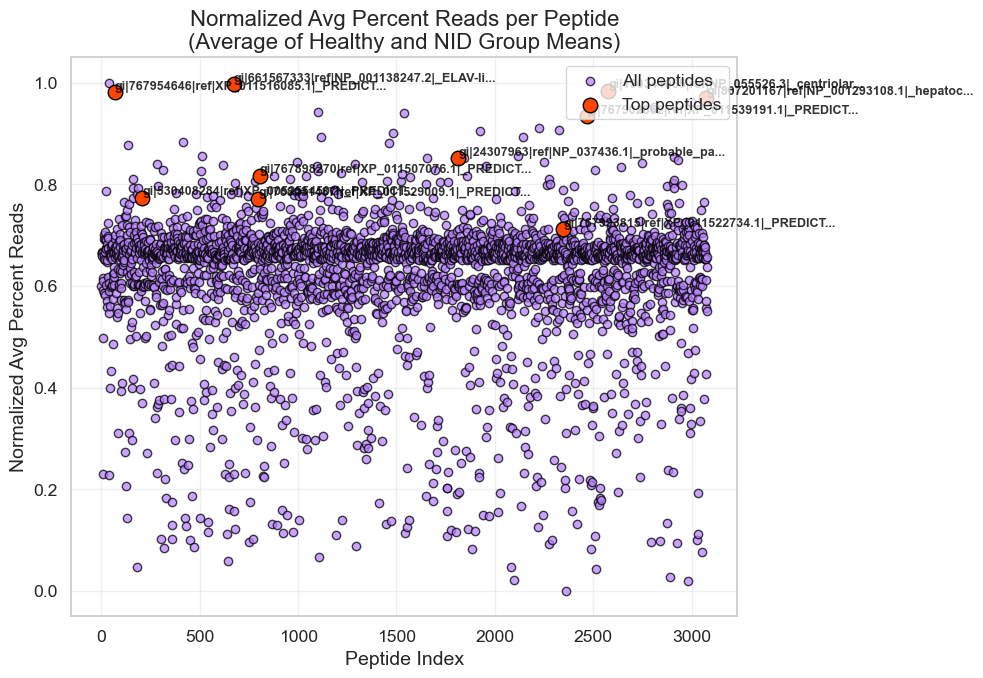

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# For each peptide, compute the mean percent in healthy, mean percent in disease, then average those two.
# Then normalize these averages across all peptides (e.g., min-max normalization to [0,1])

average_means = []
peptide_labels = []

for peptide in filtered_data.index:
    healthy_vals = filtered_data.loc[peptide, healthy_columns]
    diseased_vals = filtered_data.loc[peptide, diseased_columns]
    healthy_mean = healthy_vals.mean()
    diseased_mean = diseased_vals.mean()
    avg_mean = (healthy_mean + diseased_mean) / 2
    average_means.append(avg_mean)
    # Abbreviate label for clarity
    peptide_labels.append(peptide[:40] + "..." if len(peptide) > 40 else peptide)

# Normalize the averaged means (min-max normalization)
average_means = np.array(average_means)
min_val = np.min(average_means)
max_val = np.max(average_means)
if max_val - min_val > 0:
    normalized_means = (average_means - min_val) / (max_val - min_val)
else:
    normalized_means = np.zeros_like(average_means)

plt.figure(figsize=(10, 7))
plt.scatter(range(len(normalized_means)), normalized_means, color='#b983ff', edgecolor='black', alpha=0.75)

plt.xlabel("Peptide Index", fontsize=14)
plt.ylabel("Normalized Avg Percent Reads", fontsize=14)
plt.title("Normalized Avg Percent Reads per Peptide\n(Average of Healthy and NID Group Means)", fontsize=16)
plt.grid(alpha=0.3, axis='both')

# Optionally, highlight top peptides (from top_peptides)
for peptide in top_peptides:
    try:
        idx = list(filtered_data.index).index(peptide)
        plt.scatter(idx, normalized_means[idx],
                    color='orangered', edgecolor='black', s=110, zorder=3)
        plt.text(idx, normalized_means[idx], peptide_labels[idx],
                 fontsize=9, color='black', ha='left', va='bottom', fontweight='bold', alpha=0.8)
    except ValueError:
        # Peptide not in index
        continue

plt.legend(["All peptides", "Top peptides"], loc="upper right", frameon=True)
plt.tight_layout()
plt.show()


Average percent read for healthy samples (top peptides, 0 if not present or negative):
gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11                                                   0.000000
gi|661567333|ref|NP_001138247.2|_ELAV-like_protein_4_isoform_3_[Homo_sapiens]_fragment_11                                                               0.096671
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7                                                  0.000000
gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_9                                                    0.122041
gi|190341065|ref|NP_055526.3|_centriolar_coiled-coil_protein_of_110_kDa_isoform_2_[Homo_sapiens]_fragment_10                                            0.510638
gi|24307963|ref|NP_037436.1|_probable_palmitoyltransferase_ZDHHC1_[Homo_sapiens]_fragment_4                 

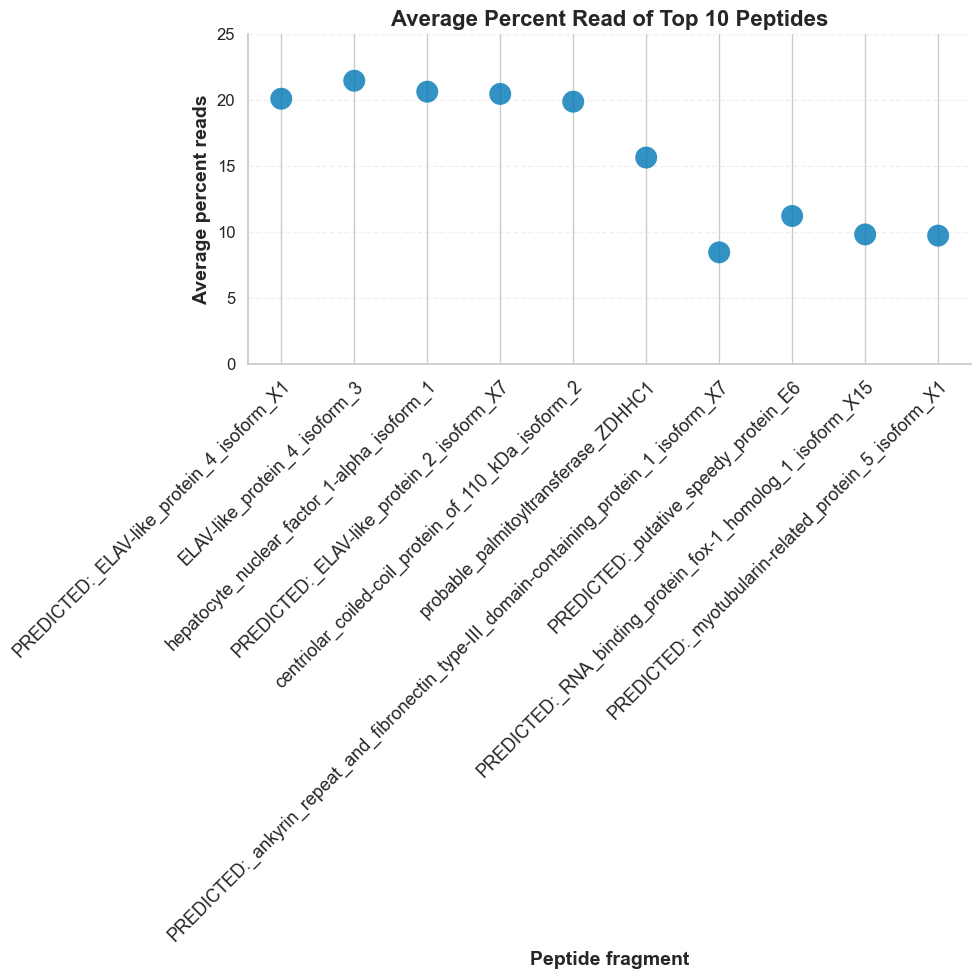

Peptide fragment labels included as x-axis labels (top 10 peptides):
['PREDICTED:_ELAV-like_protein_4_isoform_X1', 'ELAV-like_protein_4_isoform_3', 'hepatocyte_nuclear_factor_1-alpha_isoform_1', 'PREDICTED:_ELAV-like_protein_2_isoform_X7', 'centriolar_coiled-coil_protein_of_110_kDa_isoform_2', 'probable_palmitoyltransferase_ZDHHC1', 'PREDICTED:_ankyrin_repeat_and_fibronectin_type-III_domain-containing_protein_1_isoform_X7', 'PREDICTED:_putative_speedy_protein_E6', 'PREDICTED:_RNA_binding_protein_fox-1_homolog_1_isoform_X15', 'PREDICTED:_myotubularin-related_protein_5_isoform_X1']


In [ ]:
# Use exactly the top peptides as defined earlier (from context lines 23-27)
# These top_peptides are the ones used for downstream plotting/analysis
# Ensure that both healthy and diseased are always reported for *all* top_peptides
# If a peptide is missing in the DataFrame, its mean will be 0 (imputed)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def average_percent_reads_for_peptides_fixed(df, columns, peptides):
    """
    For a set of peptides, calculate average percent reads across given columns (samples).
    If a peptide is not found in the df, assign 0 for its average percent reads.
    Always returns a pandas Series indexed by 'peptides', in input order.
    If mean is negative, return 0 instead.
    """
    valid_cols = [c for c in columns if c in df.columns]
    avg_reads_dict = {}
    for pep in peptides:
        if pep in df.index:
            data = df.loc[pep, valid_cols]
            mean_val = data.mean()
            avg_reads_dict[pep] = mean_val if mean_val > 0 else 0.0
        else:
            avg_reads_dict[pep] = 0.0
    return pd.Series(avg_reads_dict)

def get_x_axis_fragment_name(peptide_header):
    # Extract protein/fragment name after XP...| part in the fasta header
    # Handles both gi|...|ref|XP_xxx|_example_name_something_[organism]_fragment_N|...
    # and gi|...|ref|NP_xxx|_example_name_something_[organism]_fragment_N|...
    # We want the part after the last '|' and before the '[' (if present), or up to the end.
    # But ignore _fragment_N at the end.
    try:
        # example: gi|530408284|ref|XP_005255450.1|_PREDICTED:_RNA_binding_protein_fox-1_homolog_1_isoform_X15_[Homo_sapiens]_fragment_14
        frag = peptide_header.split('|')[-1]
        # Remove leading underscores
        frag = frag.lstrip('_')
        # Remove anything after [
        if '[' in frag:
            frag = frag.split('[')[0]
        # Remove trailing '_fragment_X' if present
        if '_fragment_' in frag:
            frag = frag.split('_fragment_')[0]
        # Strip again for safety
        frag = frag.strip('_').strip()
        return frag
    except Exception:
        return peptide_header[:40] + "..." if len(peptide_header) > 40 else peptide_header

healthy_avg_percent_reads = average_percent_reads_for_peptides_fixed(filtered_data, healthy_columns, top_peptides)
print("Average percent read for healthy samples (top peptides, 0 if not present or negative):")
print(healthy_avg_percent_reads)

diseased_avg_percent_reads = average_percent_reads_for_peptides_fixed(filtered_data, diseased_columns, top_peptides)
print("\nAverage percent read for non-healthy (diseased) samples (top peptides, 0 if not present or negative):")
print(diseased_avg_percent_reads)

# There should always be 10 peptides for both, in order set by top_peptides
normed_percent_reads = diseased_avg_percent_reads - healthy_avg_percent_reads
# Ensure no negative numbers: If diff is below 0, set to 0
normed_percent_reads = normed_percent_reads.apply(lambda x: x if x > 0 else 0.0)

# For plot labels, extract the protein/fragment name after XP...| (parsed protein/fragment name)
peptide_labels = [get_x_axis_fragment_name(pep) for pep in top_peptides]

# --- Elongated/taller figure for better readability and to avoid cutoff ---
fig, ax = plt.subplots(figsize=(10, 10))  # Was (10, 7). Now taller.

# Calculate single value (average over two replicates) for each peptide
single_value_per_peptide = normed_percent_reads.values  # Already one per peptide as requested

x = np.arange(len(peptide_labels))
y = single_value_per_peptide

# Plot as circle markers, with NO outlines (no edgecolor)
ax.scatter(
    x, y,
    s=250,
    color='#0077b6',
    alpha=0.80,
    edgecolor='none',   # Remove the ugly outlines
    linewidth=0,
    zorder=3
)

ax.set_xlabel("Peptide fragment", fontsize=14, fontweight='bold')
ax.set_ylabel("Average percent reads", fontsize=14, fontweight='bold')
ax.set_title(
    "Average Percent Read of Top 10 Peptides",
    fontsize=16, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(peptide_labels, rotation=45, ha='right', fontsize=13, fontweight='medium', wrap=True)
ax.tick_params(axis='y', labelsize=12)

# Set y axis limits from 0 to 25 as requested
ax.set_ylim(0, 25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)

ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)

plt.subplots_adjust(bottom=0.28)  # Add more bottom margin to help prevent cutoff of x labels

plt.tight_layout()
plt.show()
# Save the current figure as a JPEG file
# Save in an editable vector format (SVG) so colors and objects can be modified later
fig.savefig("top10_peptide_percent_reads.svg", format="svg", dpi=300, bbox_inches='tight')
print("Peptide fragment labels included as x-axis labels (top 10 peptides):")
print(peptide_labels)




/var/folders/gd/jzf2g72j7g16vqvmq5s_d5xr0000gn/T/ipykernel_36579/818090995.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/gd/jzf2g72j7g16vqvmq5s_d5xr0000gn/T/ipykernel_36579/818090995.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df["Peptide Fragment"], rotation=40, ha="right", fontsize=12, fontweight="medium")


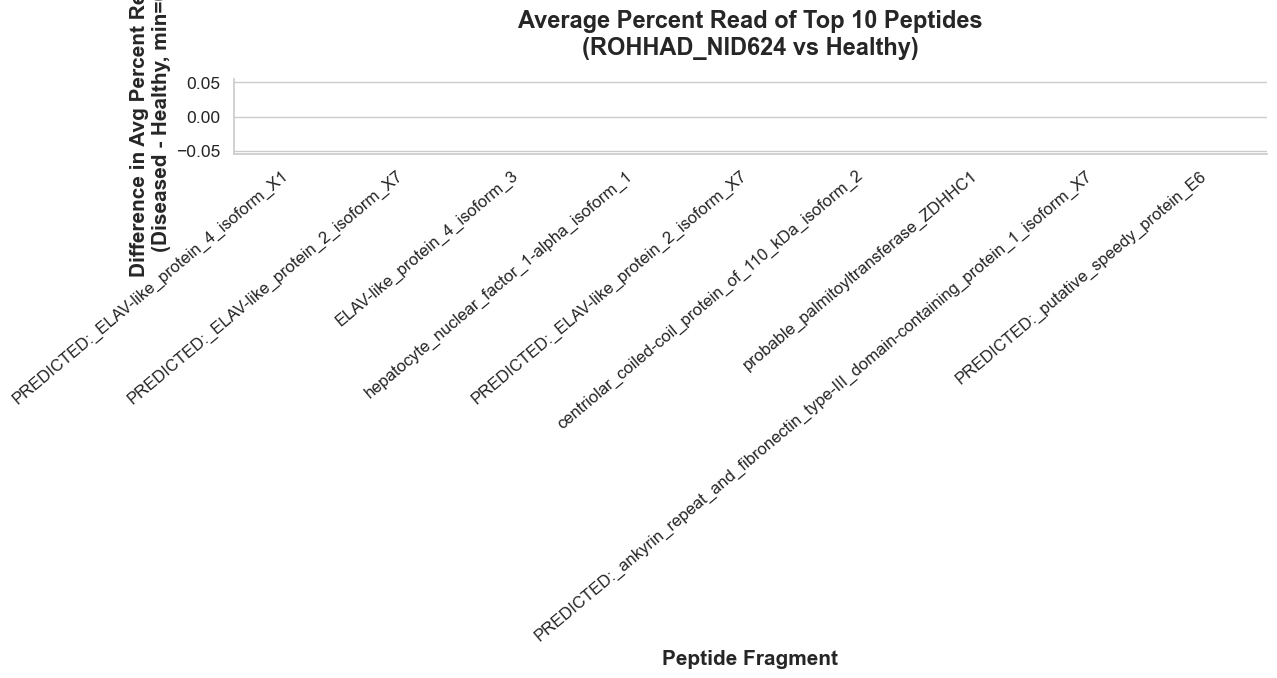

In [ ]:
# Plot the percent reads data (normed_percent_reads) beautifully with seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use fragment names (from previous code)
def extract_peptide_fragment_name(peptide_header):
    parts = peptide_header.split('|')
    if len(parts) > 3:
        core = parts[-1]
        if '[' in core:
            return core.split('[')[0].strip('_').strip()
        else:
            return core.strip('_').strip()
    else:
        no_pref = peptide_header.split('|')[-1]
        if '[' in no_pref:
            return no_pref.split('[')[0].strip('_').strip()
        return no_pref.strip('_').strip()

top10_fragment_names = [extract_peptide_fragment_name(header) for header in top10_peptides]

# Prepare percent reads data for seaborn plot (not normalized difference!)
diseased_percent_reads = (
    filtered_data.loc[top10_peptides, diseased_percent_reads_columns].mean(axis=1)
    if 'diseased_percent_reads_columns' in locals()
    else filtered_data.loc[top10_peptides, [col for col in filtered_data.columns if "ROHHAD_NID624" in col and "_percent_reads" in col]].mean(axis=1)
)
healthy_percent_reads = (
    filtered_data.loc[top10_peptides, healthy_percent_reads_columns].mean(axis=1)
    if 'healthy_percent_reads_columns' in locals()
    else filtered_data.loc[top10_peptides, [col for col in filtered_data.columns if ("Healthy" in col or "HealthyCtrl" in col) and "_percent_reads" in col]].mean(axis=1)
)

percent_reads_diff = diseased_percent_reads - healthy_percent_reads
# Zero floor (as in previous normed_percent_reads)
percent_reads_diff = percent_reads_diff.clip(lower=0)

plot_df = pd.DataFrame({
    "Peptide Fragment": top10_fragment_names,
    "Diff Percent Reads": percent_reads_diff.values
})

# Sort for descending bar order
plot_df = plot_df.sort_values("Diff Percent Reads", ascending=False)
plt.figure(figsize=(13,7))
sns.set_theme(context="notebook", style="whitegrid", font_scale=1.15)
ax = sns.barplot(
    data=plot_df,
    x="Peptide Fragment",
    y="Diff Percent Reads",
    palette="viridis"
)

for i, v in enumerate(plot_df["Diff Percent Reads"]):
    ax.text(i, v + (0.03 * plot_df["Diff Percent Reads"].max()),
            f"{v:.3f}",
            color="black", ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel("Peptide Fragment", fontsize=15, weight="bold")
ax.set_ylabel("Difference in Avg Percent Reads\n(Diseased - Healthy, min=0)", fontsize=15, weight="bold")
ax.set_title("Average Percent Read of Top 10 Peptides\n(ROHHAD_NID624 vs Healthy)",
             fontsize=17, weight="bold", pad=18)
ax.set_xticklabels(plot_df["Peptide Fragment"], rotation=40, ha="right", fontsize=12, fontweight="medium")
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate diseased sample columns as specified
diseased_columns = [
    col for col in filtered_data.columns
    if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")
]

# Use the previously defined top ten peptides (as in context/top10_peptide_hits_aa.fasta)
# If your 'top_peptides' variable contains the proper order, use top_peptides[:10] as before.
top10_peptides = top_peptides[:10]
top10_data = filtered_data.loc[top10_peptides, diseased_columns]

import pandas as pd

# For each peptide, compute the mean log2FC across those diseased samples (1 value per peptide)
top10_diseased_means = top10_data.mean(axis=1)

# Convert to a DataFrame for presentation (optional)
top10_diseased_means_df = pd.DataFrame(top10_diseased_means, columns=['Mean_log2FC_over_MockIP_ROHHAD_NID624'])

print("Mean log2FC over MockIP (ROHHAD_NID624) for top 10 peptides:")
print(top10_diseased_means_df)

Mean log2FC over MockIP (ROHHAD_NID624) for top 10 peptides:
                                                    Mean_log2FC_over_MockIP_ROHHAD_NID624
peptide                                                                                  
gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELA...                              20.081168
gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELA...                              18.628499
gi|661567333|ref|NP_001138247.2|_ELAV-like_prot...                              21.544762
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuc...                              20.614450
gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELA...                              20.567734
gi|190341065|ref|NP_055526.3|_centriolar_coiled...                              20.369565
gi|24307963|ref|NP_037436.1|_probable_palmitoyl...                              15.619710
gi|767993815|ref|XP_011522734.1|_PREDICTED:_ank...                               8.432029
gi|767898270|ref|XP_011507076.1|_PREDIC

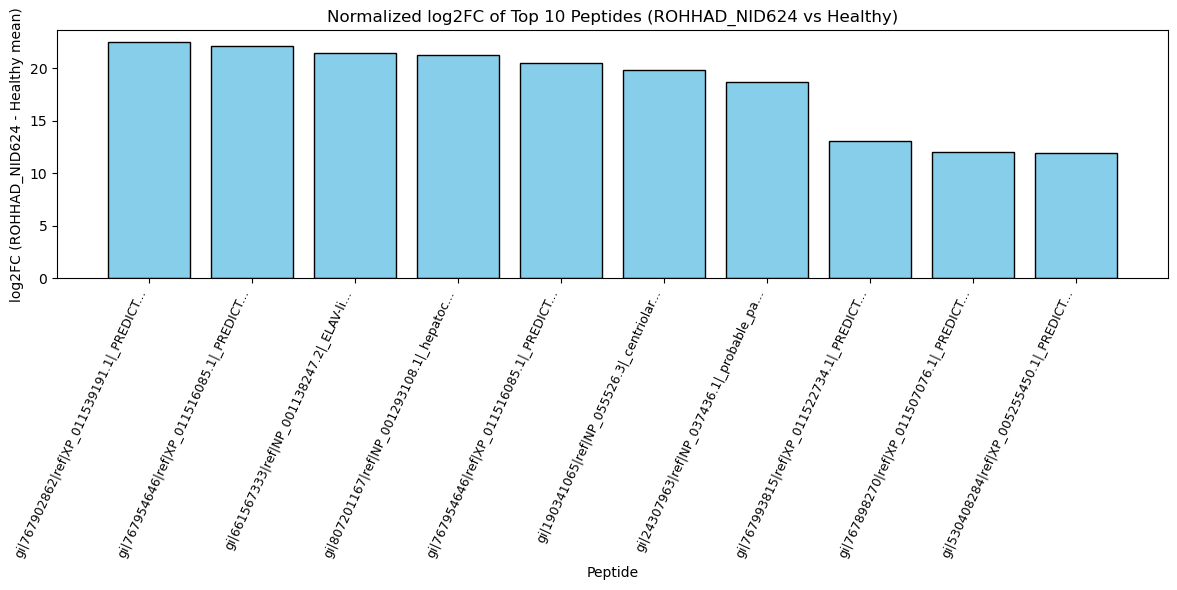

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the healthy sample columns (as before)
healthy_log2fc_columns = [
    col for col in filtered_data.columns
    if ("Healthy" in col or "HealthyCtrl" in col) and col.endswith("_log2fc_over_mockip")
]
# For each peptide, compute mean log2FC across healthy columns
top10_healthy_data = filtered_data.loc[top10_peptides, healthy_log2fc_columns]
top10_healthy_means = top10_healthy_data.mean(axis=1)  # 1 value per peptide

# Normalize diseased log2FC by subtraction of the healthy mean
normed_log2fc = top10_diseased_means - top10_healthy_means

# Plotting
plt.figure(figsize=(12,6))
peptide_labels = [p[:40] + "..." if len(p) > 40 else p for p in normed_log2fc.index]
x = np.arange(len(normed_log2fc))
plt.bar(x, normed_log2fc.values, color='skyblue', edgecolor='black')
plt.xticks(x, peptide_labels, rotation=65, ha='right', fontsize=9)
plt.ylabel("log2FC (ROHHAD_NID624 - Healthy mean)")
plt.xlabel("Peptide")
plt.title("Normalized log2FC of Top 10 Peptides (ROHHAD_NID624 vs Healthy)")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the average percent_reads for each peptide across all ROHHAD_NID624 samples
# Assumes 'filtered_data' is a DataFrame with peptides as index and samples as columns

# Find columns corresponding to ROHHAD_NID624 percent_reads
diseased_percent_reads_columns = [
    col for col in filtered_data.columns
    if "ROHHAD_NID624" in col and col.endswith("_percent_reads")
]

# For each peptide, calculate the mean percent_reads across all those columns
diseased_sum = filtered_data[diseased_percent_reads_columns].sum(axis=1)
diseased_count = filtered_data[diseased_percent_reads_columns].count(axis=1)
diseased_avg_percent_reads = diseased_sum / diseased_count
diseased_avg_percent_reads = diseased_avg_percent_reads.clip(lower=0)  # Remove any negative values just in case

# Print the result as a Series: index = peptide, value = average percent read in ROHHAD_NID624
print(diseased_avg_percent_reads)


peptide
gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapiens]_fragment_12                                         NaN
gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-containing_protein_138_isoform_X2_[Homo_sapiens]_fragment_11   NaN
gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sapiens]_fragment_1                                       NaN
gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isoform_a_[Homo_sapiens]_fragment_16                          NaN
gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapiens]_fragment_8                                          NaN
                                                                                                                               ..
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7                        NaN
gi|613410203|ref|NP_787069.4|_ankyrin_repeat_domain-containing_protein_SOWAHA_prec

In [ ]:
# ---- Find top 10 peptide matches in FASTA and convert to amino acids ----

from Bio import SeqIO
from Bio.Seq import Seq

# Paths
fasta_path = "/Users/sbecker2/Desktop/Code/DeRisi Lab/phip_seq_NID0624/Raw_data/peptidome_sequences.fasta"
output_path = "/Users/sbecker2/Desktop/Code/DeRisi Lab/phip_seq_NID0624/Raw_data/top10_peptide_hits_aa.fasta"

# Helper function to parse the FASTA into a dict: {header: sequence}
def parse_fasta(fasta_path):
    fasta_dict = {}
    for record in SeqIO.parse(fasta_path, "fasta"):
        fasta_dict[record.id] = str(record.seq)
    return fasta_dict

# Find corresponding DNA sequence in FASTA by substring match
def match_peptide_to_fasta(top_peptides, fasta_dict):
    matches = []
    for peptide in top_peptides:
        matched_header = None
        matched_seq = None
        # Try to find by substring in header or exact match in sequence
        for header, seq in fasta_dict.items():
            if peptide in header or peptide == seq:
                matched_header = header
                matched_seq = seq
                break
        matches.append((peptide, matched_header, matched_seq))
    return matches

# Parse the FASTA file into a dictionary
fasta_dict = parse_fasta(fasta_path)

# Use only the top 10 peptides from top_peptides
top10_peptides = top_peptides[:10]

# Find FASTA matches for those top 10 peptide IDs
top_peptide_seqs = match_peptide_to_fasta(top10_peptides, fasta_dict)

# Convert the matched DNA sequences to amino acids and save to a FASTA file
with open(output_path, "w") as out_f:
    for peptide, header, seq in top_peptide_seqs:
        if header is not None and seq is not None:
            try:
                aa_seq = str(Seq(seq).translate(to_stop=False))
                fasta_entry = f">{header}|matched_from:{peptide}\n{aa_seq}\n"
                out_f.write(fasta_entry)
            except Exception as e:
                out_f.write(f">{header}|matched_from:{peptide}\nTRANSLATION_ERROR: {str(e)}\n")
        else:
            out_f.write(f">NO_MATCH_FOUND|{peptide}\nNO_SEQUENCE_FOUND\n")

print(f"Amino acid FASTA written to: {output_path}")



Amino acid FASTA written to: /Users/sbecker2/Desktop/Code/DeRisi Lab/phip_seq_NID0624/Raw_data/top10_peptide_hits_aa.fasta


In [ ]:
# Convert DNA sequences to amino acid sequences

# If Biopython is not installed, uncomment the following line and run it once:
!pip install biopython

from Bio.Seq import Seq

# Function to translate DNA sequence to amino acid sequence
def translate_dna_to_aa(dna_seq):
    """
    Translate a DNA sequence to its amino acid sequence.
    DNA input (string) is assumed to be in frame and free of ambiguous bases.
    """
    # Biopython's Seq will auto-handle sequence length
    seq_obj = Seq(dna_seq)
    aa_seq = seq_obj.translate(to_stop=False)
    return str(aa_seq)

# Print translation for each matched peptide
for peptide, header, seq in top_peptide_seqs:
    print("Peptide index (from data):", peptide)
    if header is not None and seq is not None:
        print(" FASTA header: >", header)
        print(" DNA Sequence:   ", seq)
        try:
            aa_seq = translate_dna_to_aa(seq)
            print(" Amino Acid Sequence: ", aa_seq)
        except Exception as e:
            print(" Amino Acid Sequence: Could not translate. Error:", str(e))
    else:
        print(" FASTA header: NOT FOUND")
        print(" Sequence:    NOT FOUND")
        print(" Amino Acid Sequence: N/A")
    print("="*80)


Peptide index (from data): gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11
 FASTA header: > gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11
 DNA Sequence:    AGCCATCCGCAGTTCGAGAAACCGAACCGTCGTTATCCGGGCCCGCTGCATCATCAGGCGCAGCGTTTTCGTCTGGATAACCTGCTGAACATGGCGTATGGCGTGAAACGTCTGATGAGCGGCCCGGTGCCGCCGAGCGCGTGCCCGCCGCGTTTTAGCCCGATTACCGACTACAAGGACGACGATGAT
 Amino Acid Sequence:  SHPQFEKPNRRYPGPLHHQAQRFRLDNLLNMAYGVKRLMSGPVPPSACPPRFSPITDYKDDDD
Peptide index (from data): gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10
 FASTA header: > gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10
 DNA Sequence:    AGCCATCCGCAGTTCGAGAAACCGGGCCCGCTGGCGCAGCAGGCGCAGCGTTTTCGTCTGGATAACCTGCTGAACATGGCGTATGGCGTGAAAAGCCGTTTTAGCCCGATGACCATTGATGGCATGACCAGCCTGGCGGGCATTAACATTCCGGGCCATCCGGGCACCGACTACAAGGACGACGATGAT
 

In [ ]:
!pip install biopython

In [ ]:
# Alignment: Use Bio.Align.PairwiseAligner and use human reference for pairwise alignments
# WARNING: Using human genome as reference (heuristic; header must mention 'isoform_1', 'isoform_X1', or 'isoform')
from Bio import SeqIO
import os
from Bio import Align
from Bio.Seq import Seq

# Path to FASTA file containing top 10 peptide hits (amino acid sequences)
top10_fasta = "/Users/sbecker2/Desktop/Code/DeRisi Lab/phip_seq_NID0624/Raw_data/top10_peptide_hits_aa.fasta"

# Load the sequences from the FASTA file
seq_records = list(SeqIO.parse(top10_fasta, "fasta"))

if len(seq_records) < 2:
    print("Not enough valid peptide sequences for alignment.")
else:
    # Identify a human reference peptide using heuristic on headers
    human_refs = [rec for rec in seq_records if ("isoform_1" in rec.description.lower() or "isoform_x1" in rec.description.lower())]
    if not human_refs:
        human_refs = [rec for rec in seq_records if ("isoform" in rec.description.lower())]
    if not human_refs:
        human_ref = seq_records[0]
    else:
        human_ref = human_refs[0]

    print(f"Reference human peptide for alignment: {human_ref.id}")
    print("  FASTA header:", human_ref.description)
    print("  Sequence:", str(human_ref.seq))
    print("="*60)

    # Align all peptides to the selected reference using Bio.Align.PairwiseAligner
    aligner = Align.PairwiseAligner()
    aligner.mode = 'global'

    for rec in seq_records:
        if rec is human_ref:
            continue  # skip self-alignment
        print(f"Alignment: {rec.id}\n         vs reference {human_ref.id}")
        seq1 = str(rec.seq)
        seq2 = str(human_ref.seq)
        alignments = aligner.align(seq1, seq2)
        # Bio.Align.PairwiseAligner returns an alignment object that is iterable, not sliceable
        aln = next(iter(alignments))
        print(aln)
        print(f"Score: {aln.score}")
        print("="*60)

    print("Performing all-vs-all pairwise alignments using Bio.Align.PairwiseAligner:\n")
    for i in range(len(seq_records)):
        for j in range(i + 1, len(seq_records)):
            seq1 = str(seq_records[i].seq)
            seq2 = str(seq_records[j].seq)
            print(f"Alignment: {seq_records[i].id}\n         vs {seq_records[j].id}")
            alignments = aligner.align(seq1, seq2)
            aln = next(iter(alignments))
            print(aln)
            print(f"Score: {aln.score}")
            print("="*60)

    # For multiple (MSA) alignment, external tools required (e.g. MUSCLE, Clustal Omega, not available here)

Reference human peptide for alignment: gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11|matched_from:gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11
  FASTA header: gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11|matched_from:gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11
  Sequence: SHPQFEKPNRRYPGPLHHQAQRFRLDNLLNMAYGVKRLMSGPVPPSACPPRFSPITDYKDDDD
Alignment: gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10|matched_from:gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10
         vs reference gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11|matched_from:gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isofor

In [ ]:

# BLAST search these sequences using BLAST database

# if Biopython is not installed, uncomment next line
# !pip install biopython

from Bio.Blast import NCBIWWW, NCBIXML

# Choose peptides to BLAST (here: all successfully matched & translated from top_peptide_seqs)
peptide_for_blast = []
peptide_labels = []
for peptide, header, seq in top_peptide_seqs:
    if header is not None and seq is not None:
        try:
            aa_seq = translate_dna_to_aa(seq)
            # Only perform BLAST if sequence is non empty and not all X
            if len(aa_seq.strip('X')) > 0:
                peptide_for_blast.append(aa_seq)
                peptide_labels.append(peptide)
        except Exception:
            pass

# BLASTp via NCBIWWW.qblast.
# Note: This may be rate-limited. For a handful of peptides, should be okay.

blast_results = []
for idx, (label, aa_seq) in enumerate(zip(peptide_labels, peptide_for_blast)):
    print(f"BLASTing peptide {idx+1}/{len(peptide_for_blast)}: {label}")
    try:
        # Search against nr database, protein BLAST (blastp), expect threshold < 0.05
        # 'blastp', 'nr' are standard choices for NCBI program and database
        # Adjust sequence to max ~2000 aa for NCBI limits if needed!
        result_handle = NCBIWWW.qblast(
            program="blastp",
            database="nr",
            sequence=aa_seq,
            expect=0.05,
            hitlist_size=3,
            format_type="XML"
        )
        blast_results.append((label, aa_seq, result_handle.read()))
        print(f"  BLAST complete for {label}\n")
    except Exception as e:
        print(f"  BLAST failed for {label}: {e}")
        blast_results.append((label, aa_seq, None))

# Parse and print top BLAST hits
for label, aa_seq, xml_str in blast_results:
    print("="*72)
    print(f"BLASTp results for peptide: {label}")
    if xml_str is None:
        print("  No results (blast failed or not run)")
        continue
    try:
        blast_record = next(NCBIXML.parse(io.StringIO(xml_str)))
        if not blast_record.alignments:
            print("  No significant hits found.")
        else:
            for hit in blast_record.alignments[:3]:
                hsp = hit.hsps[0]
                print(f"  > {hit.title}")
                print(f"    Score: {hsp.score} | E-value: {hsp.expect}")
                print(f"    Identities: {hsp.identities}/{hsp.align_length}")
                print(f"    Query: {hsp.query[0:60]}")
                print(f"    Match: {hsp.match[0:60]}")
                print(f"    Sbjct: {hsp.sbjct[0:60]}\n")
    except Exception as ex:
        import io
        print("  Could not parse/show BLAST output:", ex)

# To save or process results further, blast_results contains: (peptide_label, aa_seq, blast_xml_string)




BLASTing peptide 1/10: gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11
  BLAST complete for gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11

BLASTing peptide 2/10: gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10
  BLAST complete for gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_sapiens]_fragment_10

BLASTing peptide 3/10: gi|661567333|ref|NP_001138247.2|_ELAV-like_protein_4_isoform_3_[Homo_sapiens]_fragment_11
  BLAST complete for gi|661567333|ref|NP_001138247.2|_ELAV-like_protein_4_isoform_3_[Homo_sapiens]_fragment_11

BLASTing peptide 4/10: gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7
  BLAST complete for gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7

BLASTing peptide 5/10: gi|

/opt/anaconda3/envs/phip_seq_env/lib/python3.10/site-packages/Bio/Blast/NCBIWWW.py:275: BiopythonWarning: BLAST request HZC6T12K016 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


  BLAST complete for gi|190341065|ref|NP_055526.3|_centriolar_coiled-coil_protein_of_110_kDa_isoform_2_[Homo_sapiens]_fragment_10

BLASTing peptide 7/10: gi|24307963|ref|NP_037436.1|_probable_palmitoyltransferase_ZDHHC1_[Homo_sapiens]_fragment_4
  BLAST complete for gi|24307963|ref|NP_037436.1|_probable_palmitoyltransferase_ZDHHC1_[Homo_sapiens]_fragment_4

BLASTing peptide 8/10: gi|767993815|ref|XP_011522734.1|_PREDICTED:_ankyrin_repeat_and_fibronectin_type-III_domain-containing_protein_1_isoform_X7_[Homo_sapiens]_fragment_2
  BLAST complete for gi|767993815|ref|XP_011522734.1|_PREDICTED:_ankyrin_repeat_and_fibronectin_type-III_domain-containing_protein_1_isoform_X7_[Homo_sapiens]_fragment_2

BLASTing peptide 9/10: gi|767898270|ref|XP_011507076.1|_PREDICTED:_putative_speedy_protein_E6_[Homo_sapiens]_fragment_0
  BLAST complete for gi|767898270|ref|XP_011507076.1|_PREDICTED:_putative_speedy_protein_E6_[Homo_sapiens]_fragment_0

BLASTing peptide 10/10: gi|530408284|ref|XP_005255450.1|_P

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded:
# - a DataFrame 'df' with peptides/fragments as rows, sample columns as columns, and values = normalized read counts (e.g., log2 fold change or CPM),
# - AND that you have a metric for "percent reads normalized to the healthy and Ag beads" (could be precomputed or calculated here).

# If not already available, here is a generic example of how to plot top 10 fragments:

# Step 1: Calculate "percent reads normalized to the healthy and Ag beads" for each fragment
# This will depend on your actual normalization procedure & DataFrame structure, but let's assume:
#  - You have columns 'HealthyCtrl' and 'MockIP' or equivalent for beads
#  - 'df' has raw or normalized counts, with "peptide" as index or a 'peptide' column

# If you have a summary statistic for each peptide (e.g., mean signal in POI samples normalized per healthy/beads),
# use that. Otherwise, here's a typical way:

# Assume you want the mean value for each peptide across POI samples, normalized to mean signal in healthy and Ag beads
poi_cols = [c for c in df.columns if 'POI' in c]
healthy_cols = [c for c in df.columns if 'Healthy' in c or 'HealthyCtrl' in c]
ag_beads_cols = [c for c in df.columns if 'MockIP' in c or 'Bead' in c or 'AgBead' in c]

# Compute mean for each group
poi_means = df[poi_cols].mean(axis=1)
healthy_means = df[healthy_cols].mean(axis=1) if healthy_cols else 1
ag_beads_means = df[ag_beads_cols].mean(axis=1) if ag_beads_cols else 1

# Percent reads normalized to healthy and Ag beads
# For each fragment, signal as percentage above both backgrounds:
# e.g. (POI mean) / (Healthy mean + Ag beads mean) * 100
percent_norm = poi_means / (healthy_means + ag_beads_means) * 100

# Step 2: Select top 10 fragments by percent_norm
top10 = percent_norm.sort_values(ascending=False).head(10)

# Step 3: Bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(10), top10.values, color='skyblue', edgecolor='black')
plt.xticks(range(10), [x[:40] + ('...' if len(x)>40 else '') for x in top10.index], rotation=45, ha='right', fontsize=10)
plt.ylabel('Percent reads (POI / [Healthy + Ag beads]) × 100', fontsize=12, fontweight='bold')
plt.xlabel("Top 10 Fragments (peptides)", fontsize=12, fontweight='bold')
plt.title("Top 10 Fragments: Percent Reads Normalized vs Healthy and Ag Beads", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



NameError: name 'df' is not defined